# Exercise

Sometimes you might want to apply multiple ML techniques. So, you might want to start with a clustering or dimensional reduction algorithm first.

Here we're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

Let's load the dataset first.

In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

print('\n')
print(digits.DESCR)

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32

1) First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer!

The following matrix contains my predictions about the numbers.

In [3]:
matrix = [[5, 9, 8, 1, 2, 6, 9], [1, 9, 4, 0, 6, 1, 7], [6, 9, 5, 4, 4, 8, 4], [0, 7, 6, 4, 7, 9, 7], 
          [2, 4, 0, 8, 3, 9, 6], [1, 7, 2, 5, 5, 4, 7], [9, 6, 7, 6, 1, 0, 0]]

print('My prevision:')
matrix

My prevision:


[[5, 9, 8, 1, 2, 6, 9],
 [1, 9, 4, 0, 6, 1, 7],
 [6, 9, 5, 4, 4, 8, 4],
 [0, 7, 6, 4, 7, 9, 7],
 [2, 4, 0, 8, 3, 9, 6],
 [1, 7, 2, 5, 5, 4, 7],
 [9, 6, 7, 6, 1, 0, 0]]

2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning. 

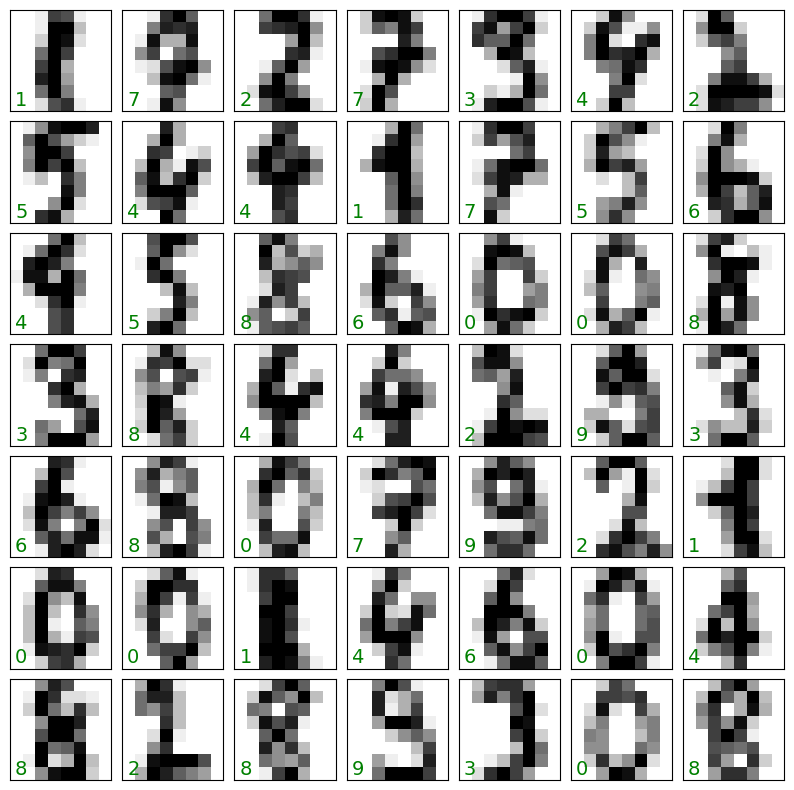

In [4]:
fig, axes = plt.subplots(7, 7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0], 100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]), transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

Ok so the data is simply each pixel value within an $8\times 8$ grid (each image is composed by $64$ pixels). For this analysis, we don't care about the $2$-D nature of the image, we can just treat it as an $8\times8=64$ dimensional array. So our data have $1797$ samples (i.e., $1797$ images) in $64$ dimensions.

Then each of the $1797$ ***images*** has a label.

In [5]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


### Part 1. Unsupervised Learning

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

### Tasks. Part 2. Supervised Learning

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which is a common classification algorithm. Use the flag `solver='sag'` (I found the default solver had a bug, at least when I tried).

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?

### Part 1

I save the images of the numbers and the labels of the digits in two arrays, respectively $X$ and $Y$, and I reduce the dimensions of the problem to $2$ with Isomap. With this initialized dimensionality reduction technique, I save in $X\_transformed$ the new data $X$ reduced in $2-D$.

In [6]:
X = digits.data
Y = digits.target

isomap = Isomap(n_components=2)

X_transformed = isomap.fit_transform(X)
X_transformed.shape

C:\Users\beasa\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\beasa\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

I plot the two columns of the new array in a scatter plot.

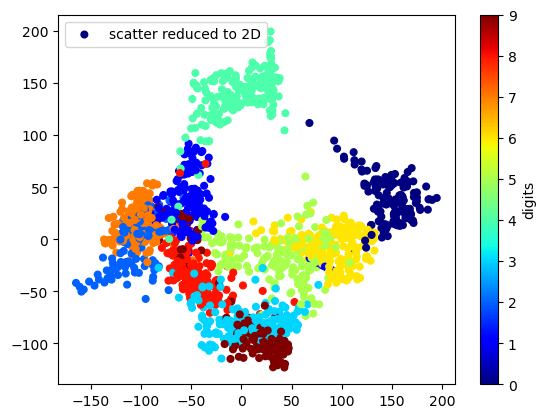

In [7]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], label='scatter reduced to 2D', s=23, c=Y, cmap=plt.colormaps['jet'])
plt.colorbar(label='digits', ticks=range(10))  # the range is 10 because I have as digits: 0, 1, ..., 9
plt.legend()
plt.show()

### Part 2

To start, I split the data into training and validation sets, by taking $80\%$ of the images as part of the training set. Then, I initialize a Logistic Regression classifier and I fit the training data.

In [8]:
X_training, X_validation, y_training, y_validation = sklearn.model_selection.train_test_split(X, Y, train_size=0.8)

# print(len(X)/len(X), len(X_training)/len(X), len(X_validation)/len(X))  # to check the percentages
# print(len(Y)/len(Y), len(y_training)/len(Y), len(y_validation)/len(Y))

In [9]:
clf = sklearn.linear_model.LogisticRegression(penalty='l2', max_iter=2000, solver='sag')
clf.fit(X_training, y_training)

LogisticRegression(max_iter=2000, solver='sag')

To understand wheter the model has learnt from the training set, I compute the y-prediction for $X\_training$ and I compare it to the actual values of $y\_training$; I print the accuracy. I do the same but with the validation set.

In [11]:
Y_pred_training = clf.predict(X_training)
accuracy_train = sklearn.metrics.accuracy_score(y_training, Y_pred_training)
print(f'Accuracy for the training set: {accuracy_train:.2f}')

Y_pred_val = clf.predict(X_validation)
accuracy_val = sklearn.metrics.accuracy_score(y_validation, Y_pred_val)
print(f'Accuracy for the validation set: {accuracy_val:.2f}')

Accuracy for the training set: 1.00
Accuracy for the validation set: 0.96


The accuracy is high both for training and validation sets: the model is able to distinguish the digits and to predict the value for new digits. Of course, the accuracy for the training set is $1$ because I have trained the Logistic Regression classifier with such data set.

Now I get the confusion matrix with $sklearn.metrics.confusion\_matrix()$.

In [12]:
conf_matrix = sklearn.metrics.confusion_matrix(y_validation, Y_pred_val)

print(conf_matrix)

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  1  0]
 [ 0  0  0  0  1 33  0  0  0  3]
 [ 0  0  0  0  0  1 36  0  0  0]
 [ 0  0  0  0  1  0  0 34  1  0]
 [ 0  2  0  0  1  0  0  1 35  0]
 [ 0  0  0  0  0  1  0  0  1 37]]


To plot the resulting confusion matrix, I consider the logarithm to better distinguish the colors.

C:\Users\beasa\AppData\Local\Temp\ipykernel_19012\2198110368.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(conf_matrix), cmap='Oranges', interpolation='nearest')


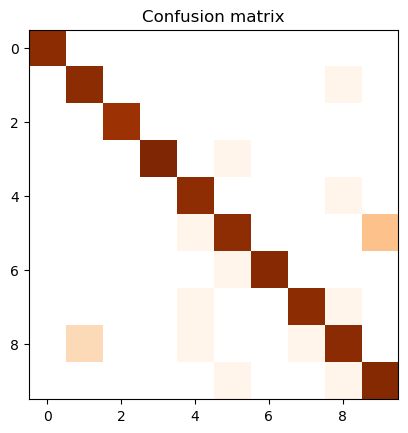

In [13]:
# plt.imshow(conf_matrix, cmap='Oranges', interpolation='nearest')
plt.imshow(np.log(conf_matrix), cmap='Oranges', interpolation='nearest')

plt.title('Confusion matrix')
plt.show()